In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [77]:
df = pd.read_csv(r"C:\My data\Portfolio 00\Python\House price prediction ML\housing.csv")

In [78]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [79]:
# Want to predict median_house_value (target variable), the other columns will use them as input features to predict

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [81]:
# Droping the rows that have lost values for total_bedrooms (because they are not that much)

df.dropna(inplace = True)

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [83]:
# We have to split data for training and test and we have to split it to x and y (x = all columns except median_house_value)
# and (y = just median_house_value)

from sklearn.model_selection import train_test_split

x = df.drop(['median_house_value'], axis = 1)
y = df['median_house_value']

In [84]:
x.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY


In [85]:
y.head()

0    452600.0
1    358500.0
2    352100.0
3    341300.0
4    342200.0
Name: median_house_value, dtype: float64

In [86]:
# Going to create test ad train data and clarify how much percentage do you want data to use for test (20% for test)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [87]:
# Want to split training data to training and validation set

train_data = x_train.join(y_train)

In [88]:
train_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
9273,-122.58,38.15,9.0,1302.0,177.0,682.0,190.0,7.5000,<1H OCEAN,423200.0
15888,-122.39,37.74,45.0,1462.0,308.0,924.0,302.0,2.1767,NEAR BAY,185300.0
13258,-117.69,34.10,17.0,3759.0,1035.0,1722.0,847.0,2.6074,INLAND,137500.0
4282,-118.32,34.10,36.0,1655.0,690.0,1957.0,633.0,1.7325,<1H OCEAN,221900.0
7427,-118.20,33.95,41.0,679.0,184.0,788.0,185.0,2.1406,<1H OCEAN,165300.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

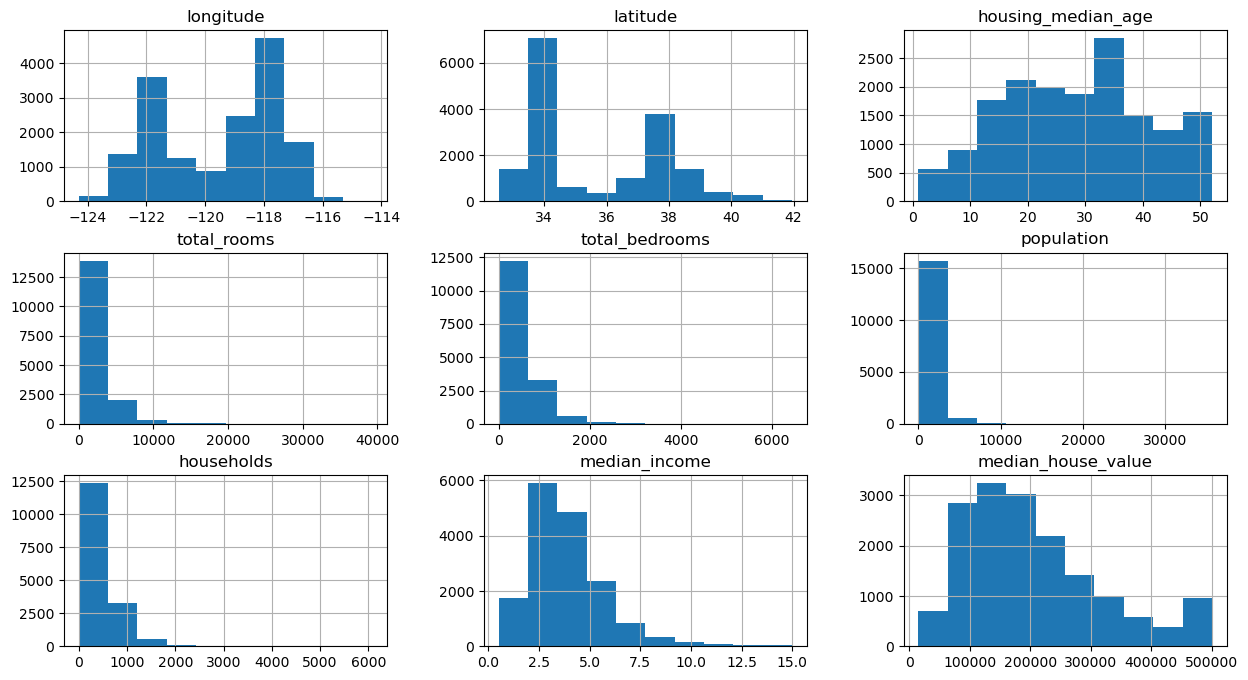

In [89]:
train_data.hist(figsize = (15, 8))

In [90]:
# Correlation between each feature 

train_data.corr()

C:\Users\14184\AppData\Local\Temp\ipykernel_13456\2001543876.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_data.corr()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.925174,-0.108363,0.043645,0.067009,0.096518,0.054008,-0.009774,-0.039239
latitude,-0.925174,1.000000,0.009976,-0.033390,-0.063234,-0.104365,-0.067657,-0.084707,-0.150460
housing_median_age,-0.108363,0.009976,1.000000,-0.358499,-0.319601,-0.294623,-0.302754,-0.119486,0.107404
total_rooms,0.043645,-0.033390,-0.358499,1.000000,0.933266,0.859399,0.922312,0.194222,0.128850
total_bedrooms,0.067009,-0.063234,-0.319601,0.933266,1.000000,0.878050,0.979896,-0.005484,0.049127
population,0.096518,-0.104365,-0.294623,0.859399,0.878050,1.000000,0.907612,0.007047,-0.025657
households,0.054008,-0.067657,-0.302754,0.922312,0.979896,0.907612,1.000000,0.014848,0.063933
median_income,-0.009774,-0.084707,-0.119486,0.194222,-0.005484,0.007047,0.014848,1.000000,0.682901
median_house_value,-0.039239,-0.150460,0.107404,0.128850,0.049127,-0.025657,0.063933,0.682901,1.000000


C:\Users\14184\AppData\Local\Temp\ipykernel_13456\1466140202.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(), annot = True, cmap = "YlGnBu")


<Axes: >

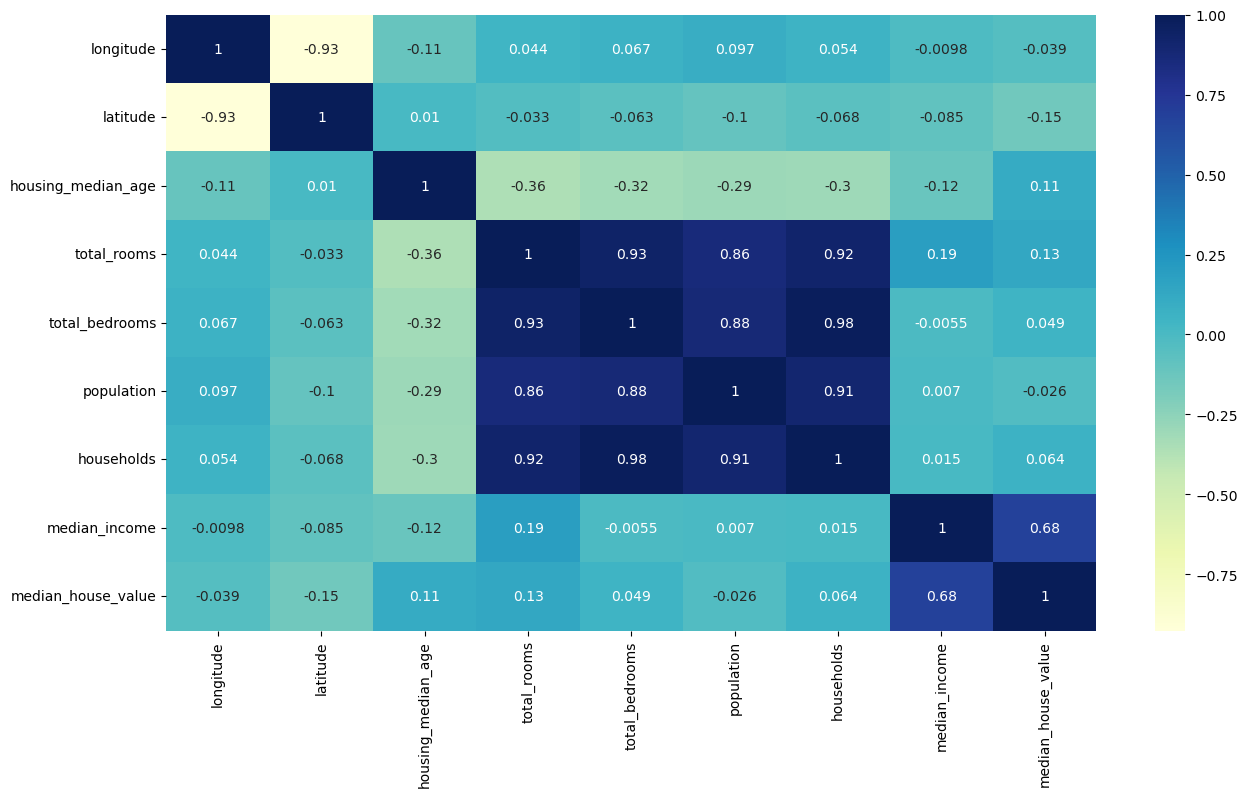

In [91]:
# Heatmap correlation

plt.figure(figsize = (15, 8))
sns.heatmap(train_data.corr(), annot = True, cmap = "YlGnBu")

In [92]:
# Going to deep preprocessing

train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

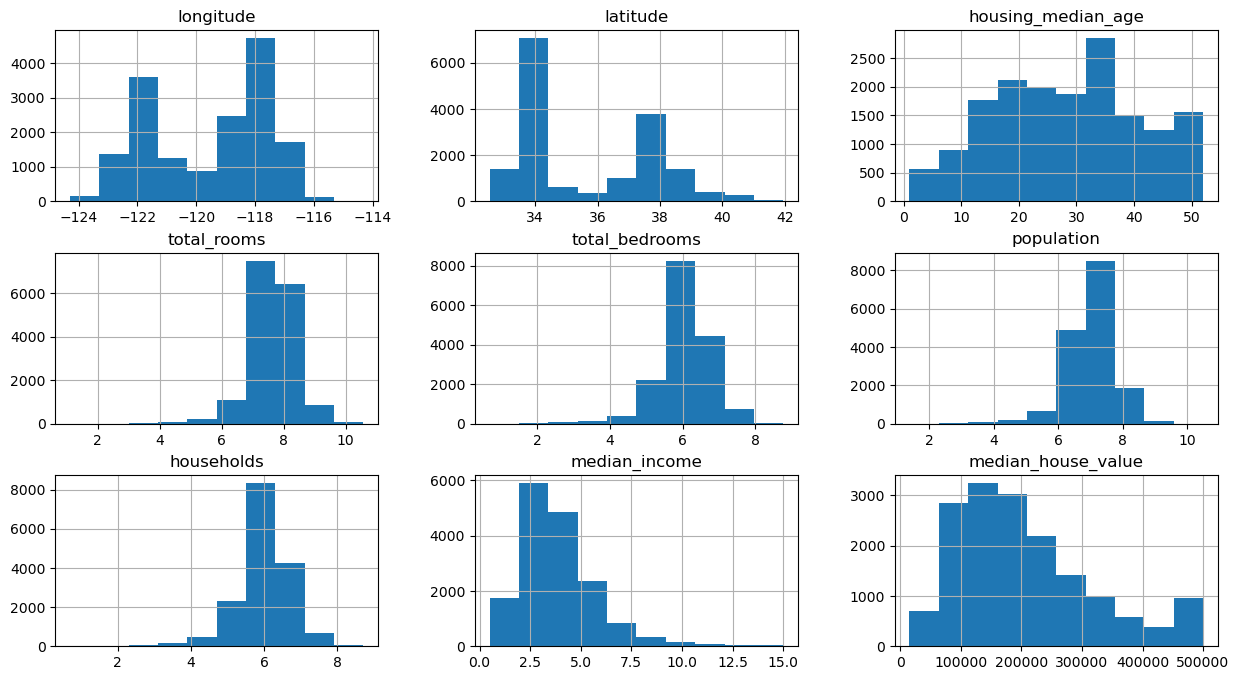

In [93]:
train_data.hist(figsize = (15, 8))

In [94]:
train_data.ocean_proximity.value_counts()

<1H OCEAN     7207
INLAND        5228
NEAR OCEAN    2076
NEAR BAY      1832
ISLAND           3
Name: ocean_proximity, dtype: int64

In [95]:
# Convert ocean_proximity to numerical values like binary

train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis = 1)

In [96]:
train_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
9273,-122.58,38.15,9.0,7.172425,5.181784,6.526495,5.252273,7.5000,423200.0,1,0,0,0,0
15888,-122.39,37.74,45.0,7.288244,5.733341,6.829794,5.713733,2.1767,185300.0,0,0,0,1,0
13258,-117.69,34.10,17.0,8.232174,6.943122,7.451822,6.742881,2.6074,137500.0,0,1,0,0,0
4282,-118.32,34.10,36.0,7.412160,6.538140,7.579679,6.452049,1.7325,221900.0,1,0,0,0,0
7427,-118.20,33.95,41.0,6.522093,5.220356,6.670766,5.225747,2.1406,165300.0,1,0,0,0,0


<Axes: >

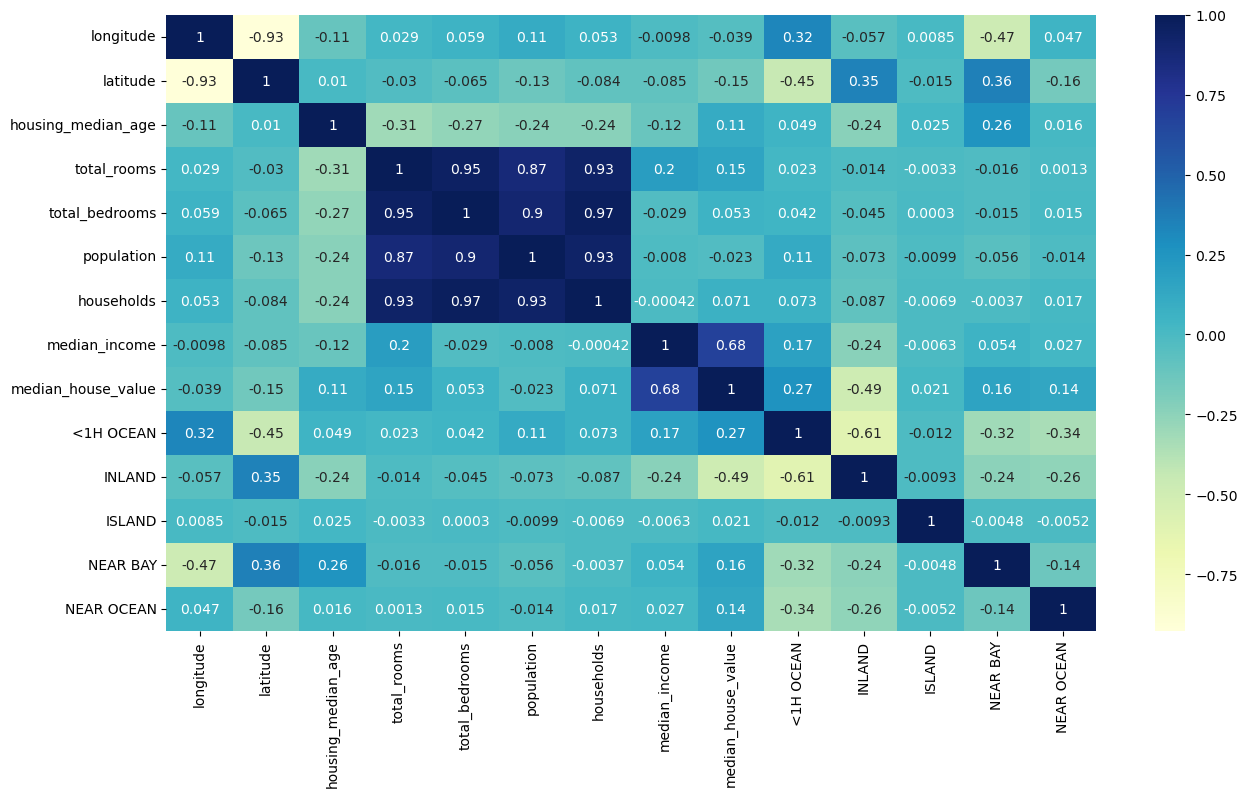

In [97]:
plt.figure(figsize = (15, 8))
sns.heatmap(train_data.corr(), annot = True, cmap = "YlGnBu")

<Axes: xlabel='latitude', ylabel='longitude'>

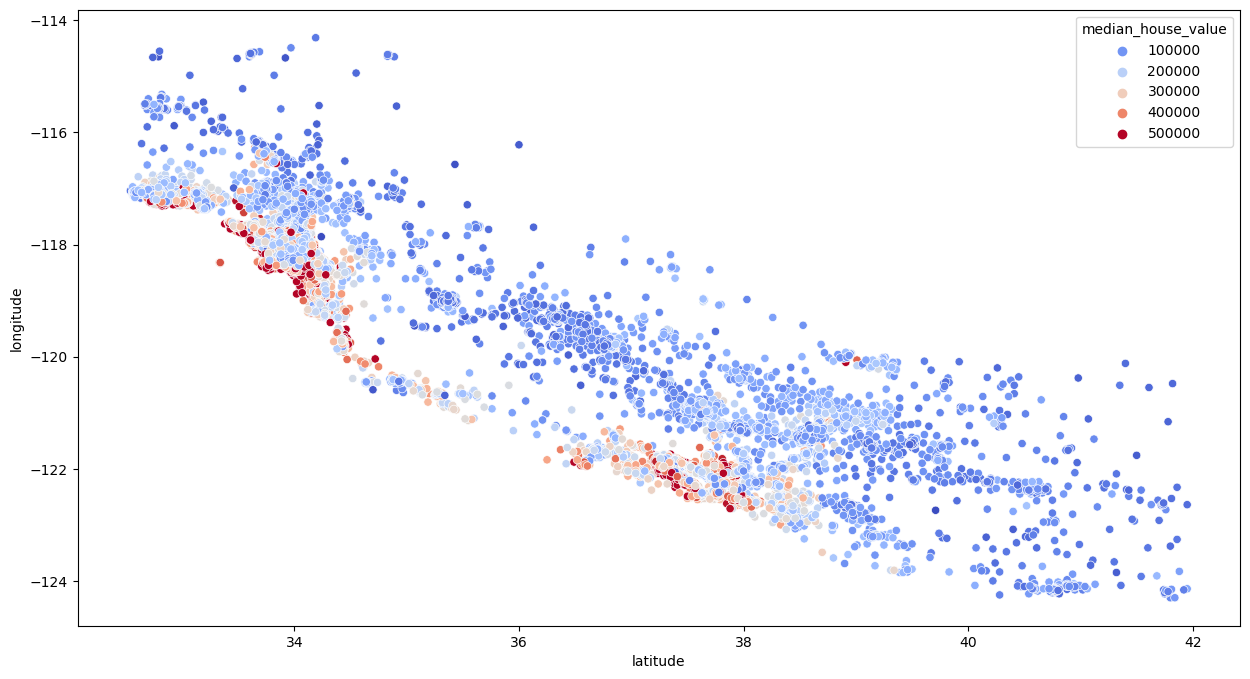

In [98]:
plt.figure(figsize = (15, 8))
sns.scatterplot( x = "latitude", y = "longitude", data = train_data, hue = "median_house_value", palette = "coolwarm")

In [99]:
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms'] / train_data['households']

<Axes: >

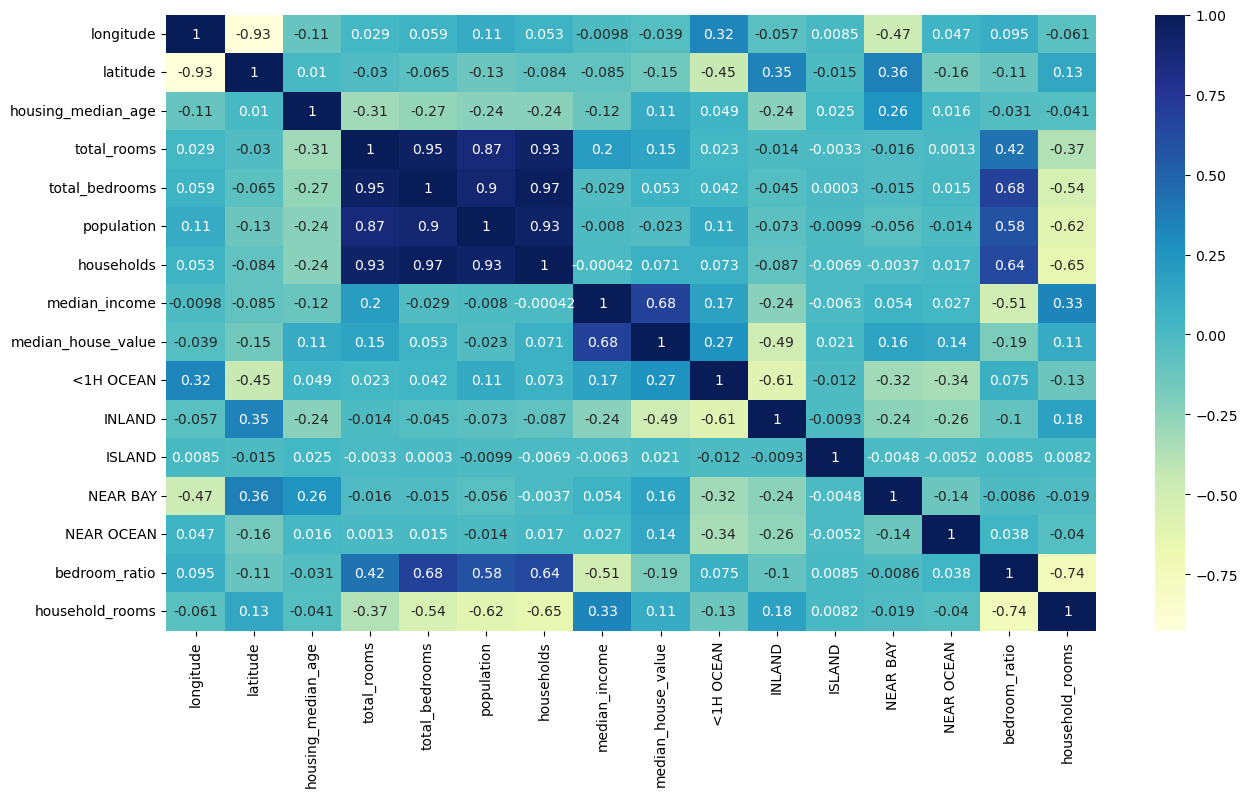

In [100]:
plt.figure(figsize = (15, 8))
sns.heatmap(train_data.corr(), annot = True, cmap = "YlGnBu")

In [107]:
# Linear Regression Model

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train, y_train = train_data.drop(['median_house_value'], axis = 1), train_data['median_house_value']
x_train_s = scaler.fit_transform(x_train)

reg = LinearRegression()
reg.fit(x_train_s, y_train)

LinearRegression()

In [102]:
test_data = x_test.join(y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'], axis = 1)

test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms'] / test_data['households']

x_test, y_test = test_data.drop(['median_house_value'], axis = 1), test_data['median_house_value']

In [108]:
x_test_s = scaler.transform (x_test)

In [103]:
test_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
6099,-117.88,34.11,30.0,8.033658,6.401917,7.605392,6.429719,4.1411,182700.0,1,0,0,0,0,0.796887,1.249457
5649,-118.29,33.74,41.0,7.232010,5.891644,6.809039,5.843544,2.7500,238300.0,0,0,0,0,1,0.814662,1.237607
20054,-119.30,35.87,20.0,7.567863,5.934894,7.201916,5.820083,2.1434,62600.0,0,1,0,0,0,0.784223,1.300302
2923,-119.03,35.36,41.0,7.844633,6.388561,7.202661,6.390241,1.9671,76800.0,0,1,0,0,0,0.814386,1.227596
6480,-118.04,34.09,32.0,7.200425,5.814131,6.706862,5.857933,2.8333,186000.0,0,1,0,0,0,0.807470,1.229175


In [104]:
train_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
9273,-122.58,38.15,9.0,7.172425,5.181784,6.526495,5.252273,7.5000,423200.0,1,0,0,0,0,0.722459,1.365585
15888,-122.39,37.74,45.0,7.288244,5.733341,6.829794,5.713733,2.1767,185300.0,0,0,0,1,0,0.786656,1.275566
13258,-117.69,34.10,17.0,8.232174,6.943122,7.451822,6.742881,2.6074,137500.0,0,1,0,0,0,0.843413,1.220869
4282,-118.32,34.10,36.0,7.412160,6.538140,7.579679,6.452049,1.7325,221900.0,1,0,0,0,0,0.882083,1.148807
7427,-118.20,33.95,41.0,6.522093,5.220356,6.670766,5.225747,2.1406,165300.0,1,0,0,0,0,0.800411,1.248069


In [109]:
reg.score(x_test_s, y_test)

0.6857008239289855

In [112]:
# Random Forest Model

from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(x_train_s,y_train)

RandomForestRegressor()

In [114]:
forest.score(x_test_s, y_test)

0.8310449839164623

In [120]:
from sklearn.model_selection import GridSearchCV

forest = RandomForestRegressor()

param_grid = {
    "n_estimators": [30, 50, 100],
    "max_features": [8, 12, 20],
    "min_samples_split": [2, 4, 6, 8]
}

grid_search = GridSearchCV(forest, param_grid, cv = 5,
                          scoring = "neg_mean_squared_error",
                          return_train_score = True)

grid_search.fit(x_train_s, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [8, 12, 20],
                         'min_samples_split': [2, 4, 6, 8],
                         'n_estimators': [30, 50, 100]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [118]:
best_forest = grid_search.best_estimator_

In [119]:
best_forest.score(x_test_s, y_test)

0.822719483087305